# Time Series Models

## Importing Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/datamining/walmart

/content/drive/MyDrive/datamining/walmart


In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math

from statsmodels.tsa.stattools import adfuller

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from pandas.plotting import autocorrelation_plot as auto_corr
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# from arch import arch_model
# from arch.univariate import ARX, GARCH, StudentsT, Normal

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn import preprocessing

In [ ]:
pd.options.display.max_columns=100 # to see columns

In [ ]:
df = pd.read_csv('clean_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True) #dropping default column

In [ ]:
df.head() # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [ ]:
df.set_index('Date', inplace=True) #seting date as index

In [ ]:
df.head()

,Unnamed: 0,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,2,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,3,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,4,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


# Plotting Sales

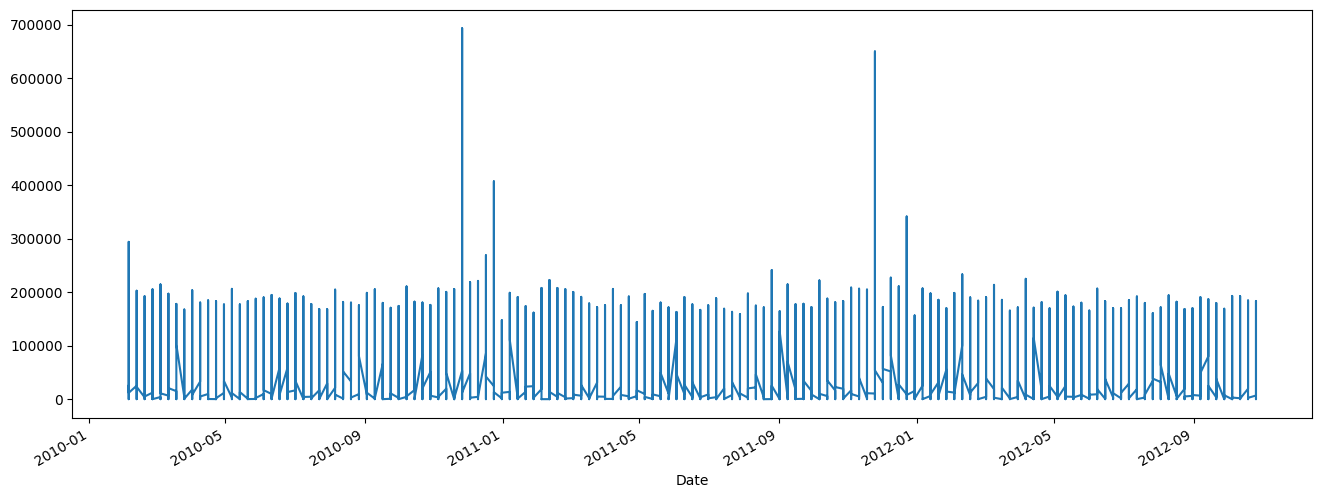

In [ ]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [ ]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Check which rows have non-numeric values
non_numeric_rows = df_numeric.isnull().any(axis=1)

# Print rows with non-numeric values
print(df[non_numeric_rows])

            Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Date                                                                        
2010-02-05      1     1      24924.50      False        42.31       2.572   
2010-02-05      1     2      50605.27      False        42.31       2.572   
2010-02-05      1     3      13740.12      False        42.31       2.572   
2010-02-05      1     4      39954.04      False        42.31       2.572   
2010-02-05      1     5      32229.38      False        42.31       2.572   
...           ...   ...           ...        ...          ...         ...   
2012-10-26     45    93       2487.80      False        58.85       3.882   
2012-10-26     45    94       5203.31      False        58.85       3.882   
2012-10-26     45    95      56017.47      False        58.85       3.882   
2012-10-26     45    97       6817.48      False        58.85       3.882   
2012-10-26     45    98       1076.80      False        58.85       3.882   

In [ ]:
df_week = df.drop('Type', axis=1).resample('W').mean()

In [ ]:
df_week.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,16887.602166,0.0,33.282800,2.717968,0.0,0.0,0.0,0.0,0.0,167.328549,8.578592,137381.684997,0.0,0.0,0.0,0.0,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,16390.912208,1.0,33.370444,2.695955,0.0,0.0,0.0,0.0,0.0,167.401961,8.567855,137675.080027,1.0,0.0,0.0,0.0,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,16255.185970,0.0,37.032596,2.673506,0.0,0.0,0.0,0.0,0.0,167.386208,8.574593,137277.810101,0.0,0.0,0.0,0.0,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,14955.932194,0.0,38.624806,2.685486,0.0,0.0,0.0,0.0,0.0,167.708233,8.562094,137365.977551,0.0,0.0,0.0,0.0,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,15964.821240,0.0,42.367490,2.731923,0.0,0.0,0.0,0.0,0.0,167.680036,8.573890,137556.273161,0.0,0.0,0.0,0.0,9.0,3.0,2010.0


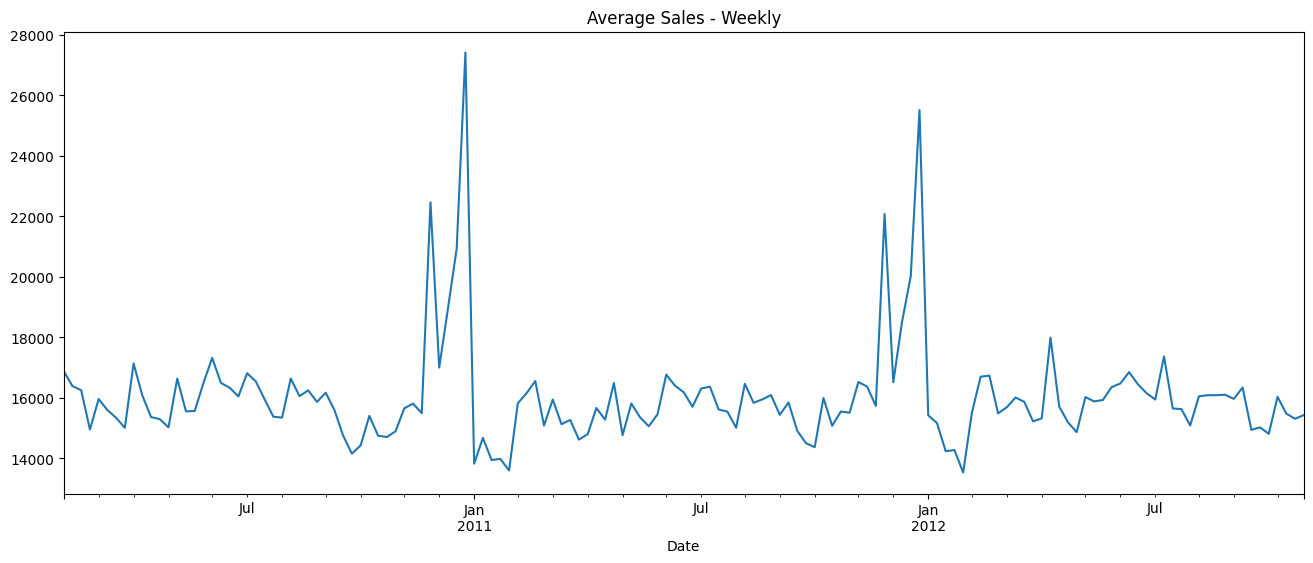

In [ ]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

# Adfuller Test to Make Sure

In [ ]:
result = adfuller(df_week['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.927107
p-value: 0.000000


# Decomposing Weekly Data to Observe Seasonality

<Figure size 2000x600 with 0 Axes>

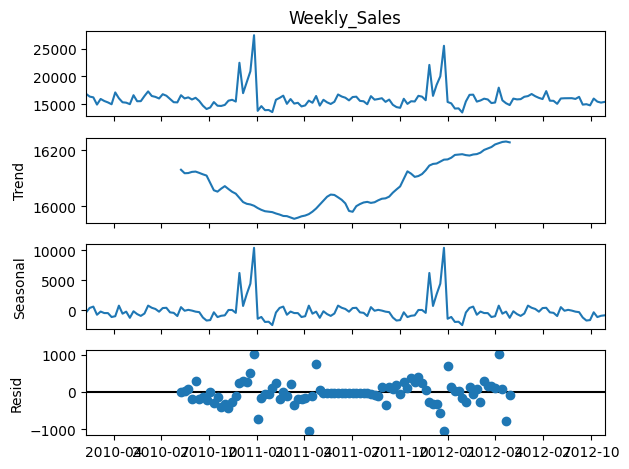

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df_week['Weekly_Sales'], model="additive")
decompose_data.plot();

# Multiple model

In [ ]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [ ]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:
import numpy as np
from sklearn import metrics
import csv
with open('/content/drive/MyDrive/datamining/walmart/forcast.csv', 'w', newline='') as w:
  writer = csv.writer(w)
  writer.writerow(['Store', 'Department', 'Number of weeks', 'ARIMA_Model', 'MAE', 'MSE', 'RMSE', 'R2'])

with open('/content/drive/MyDrive/datamining/walmart/forcast.csv', 'a', newline='') as w:
  writer = csv.writer(w)
  for (store, department), group_data in df.groupby(['Store', 'Dept']):
      # Extract the relevant subset of data for the current store-department pair
      subset_data = group_data['Weekly_Sales']  # Assuming 'Sales' is the column name for sales values
      df_week_diff = subset_data.diff().dropna()
      train_data_diff = df_week_diff[:int(0.7 * len(df_week_diff))]
      test_data_diff = df_week_diff[int(0.7 * len(df_week_diff)):]

      # Apply auto_arima to get the best ARIMA model and forecast
      if len(train_data_diff) > 1 and len(test_data_diff) > 1:
        model_auto_arima = auto_arima(train_data_diff, trace=True, start_p=0, start_q=0, start_P=0, start_Q=0,
                                      max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True, maxiter=200,
                                      information_criterion='aic', stepwise=False, suppress_warnings=True, D=1, max_D=10,
                                      error_action='ignore', approximation=False)
        model_auto_arima.fit(train_data_diff)

        # Make predictions on the test data
        y_pred = model_auto_arima.predict(len(test_data_diff))
        mae = metrics.mean_absolute_error(test_data_diff, y_pred)
        mse = metrics.mean_squared_error(test_data_diff, y_pred)
        rmse = np.sqrt(mse)
        r2 = metrics.explained_variance_score(test_data_diff, y_pred)

        writer.writerow([store, department, len(subset_data), model_auto_arima, mae, mse, rmse, r2])

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=871.662, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=869.835, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=870.113, Time=0.18 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=877.059, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=868.191, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=873.735, Time=0.61 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=876.532, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=872.100, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=878.345, Time=0

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

# Auto-ARIMA MODEL

### Train-Test Split

In [ ]:
train_data_diff = df_week['Weekly_Sales'] [:int(0.7*(len(df_week['Weekly_Sales'] )))]
test_data_diff = df_week['Weekly_Sales'] [int(0.7*(len(df_week['Weekly_Sales'] ))):]

In [ ]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-130.444, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-159.738, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-157.815, Time=0.43 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-152.138, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-158.476, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-153.787, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-168.719, Time=0.53 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=-160.763

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

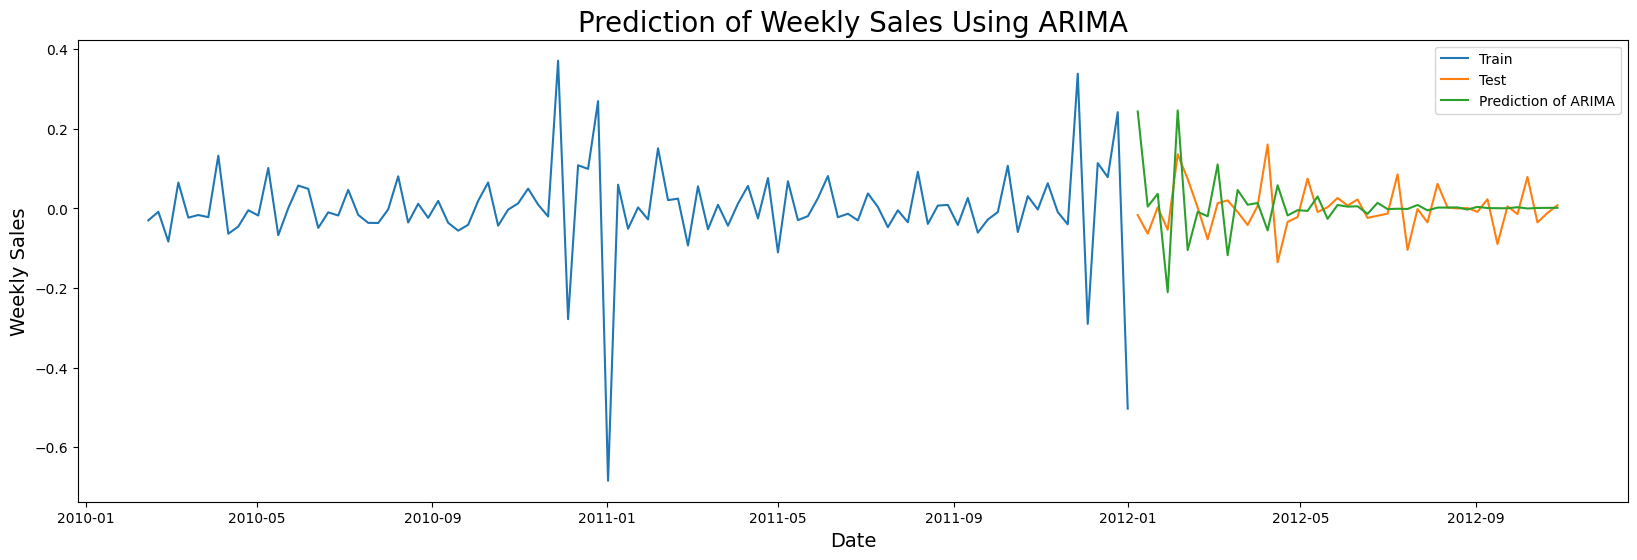

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data_diff.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
model_sarima = auto_arima(train_data_diff, start_p=0, start_q=0,
                           max_p=20, max_q=20, m=52,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
model_sarima.fit(train_data_diff)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=15.40 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=767.241, Time=0.67 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=741.397, Time=5.69 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=13.28 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=762.789, Time=0.30 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=26.69 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=743.397, Time=8.25 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=11.37 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=32.12 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=4.72 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=740.863, Time=10.20 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=761.727, Time=0.52 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=65.90 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=11.87 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=14.7

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

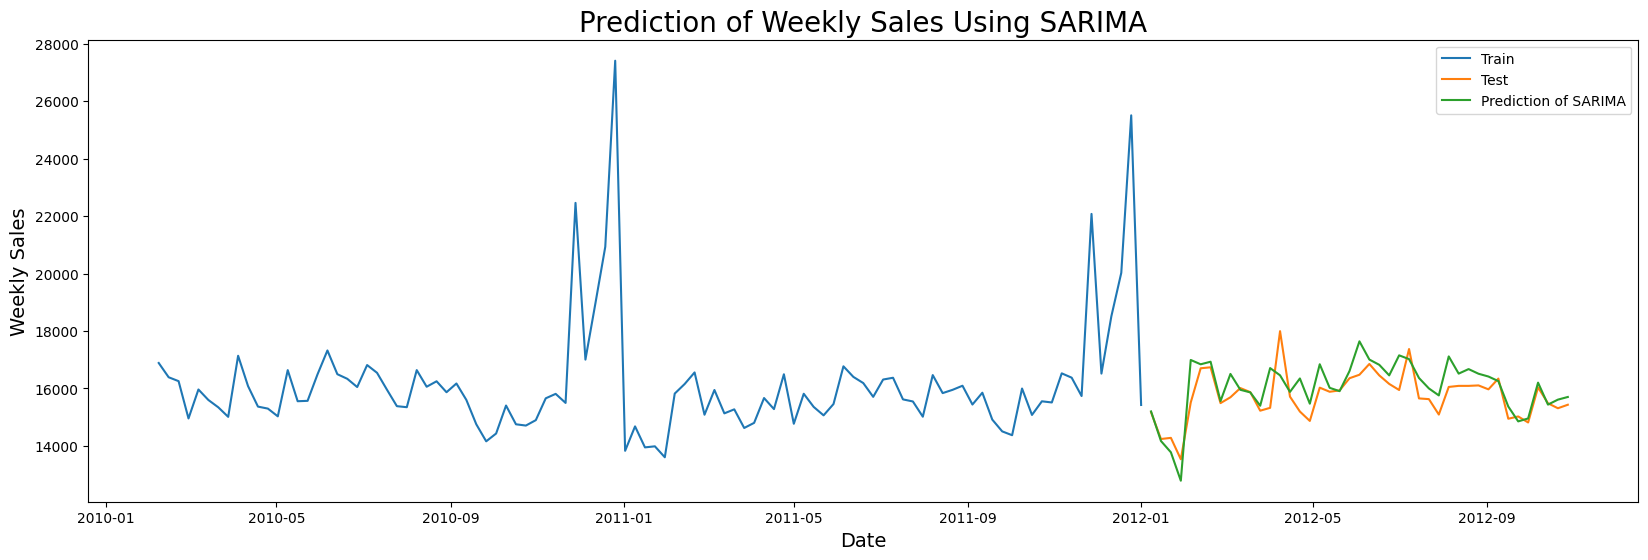

In [ ]:
y_pred = model_sarima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data_diff.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using SARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of SARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

# Metric

In [ ]:
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
wmae_test(test_data_diff, y_pred)

0.06450966935498498

In [ ]:
import numpy as np
from sklearn import metrics
print("MAE" , metrics.mean_absolute_error(test_data_diff, y_pred))
print("MSE" , metrics.mean_squared_error(test_data_diff, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(test_data_diff, y_pred)))
print("R2" , metrics.explained_variance_score(test_data_diff, y_pred))

MAE 469.3827846116856
MSE 400750.0975423854
RMSE 633.0482584624851
R2 0.5197131375403594


In [ ]:
y_pred = model_sarima.predict(n_periods=len(test_data_diff))
wmae_test(test_data_diff, y_pred)

0.08422900318921897

In [ ]:
import numpy as np
from sklearn import metrics
print("MAE" , metrics.mean_absolute_error(test_data_diff, y_pred))
print("MSE" , metrics.mean_squared_error(test_data_diff, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(test_data_diff, y_pred)))
print("R2" , metrics.explained_variance_score(test_data_diff, y_pred))

MAE 0.09024791227558995
MSE 0.013880286284171298
RMSE 0.11781462678365237
R2 -3.3773636542483567


# Store 4

In [ ]:
store4 = df[df.Store == 4]
store4.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,4,1,38724.42,False,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,A,205863,False,False,False,False,5,2,2010
2010-02-05,4,2,91481.24,False,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,A,205863,False,False,False,False,5,2,2010
2010-02-05,4,3,16166.02,False,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,A,205863,False,False,False,False,5,2,2010
2010-02-05,4,4,59554.57,False,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,A,205863,False,False,False,False,5,2,2010
2010-02-05,4,5,48602.55,False,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,A,205863,False,False,False,False,5,2,2010


In [ ]:
store4dept1 = store4[store4.Dept == 1]
store4dept1.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,4,1,38724.42,False,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,A,205863,False,False,False,False,5,2,2010
2010-02-12,4,1,69872.44,True,28.84,2.573,0.0,0.0,0.0,0.0,0.0,126.496258,8.623,A,205863,True,False,False,False,6,2,2010
2010-02-19,4,1,49937.09,False,36.45,2.540,0.0,0.0,0.0,0.0,0.0,126.526286,8.623,A,205863,False,False,False,False,7,2,2010
2010-02-26,4,1,30107.54,False,41.36,2.590,0.0,0.0,0.0,0.0,0.0,126.552286,8.623,A,205863,False,False,False,False,8,2,2010
2010-03-05,4,1,31580.69,False,43.49,2.654,0.0,0.0,0.0,0.0,0.0,126.578286,8.623,A,205863,False,False,False,False,9,3,2010


In [ ]:
store4dept1 = pd.DataFrame(store4dept1.Weekly_Sales.groupby(store4dept1.index).sum())
store4dept1.dtypes
store4dept1.head(20)

,Weekly_Sales
Date,
2010-02-05,38724.42
2010-02-12,69872.44
2010-02-19,49937.09
2010-02-26,30107.54
2010-03-05,31580.69
2010-03-12,29452.49
2010-03-19,30853.27
2010-03-26,33401.19
2010-04-02,75535.18


In [ ]:
len(store4dept1)

143

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(store4dept1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.260466
p-value: 0.185035


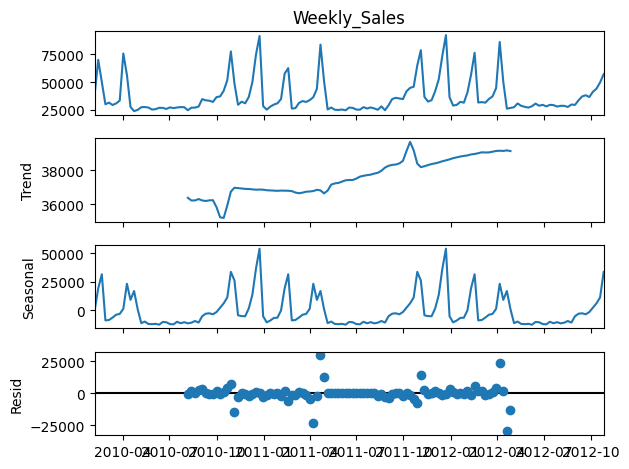

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(store4dept1['Weekly_Sales'], model="additive")
decompose_data.plot();

In [ ]:
df_week_diff = store4dept1['Weekly_Sales'].diff(52).dropna() #creating difference values

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_week_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.017132
p-value: 0.000000


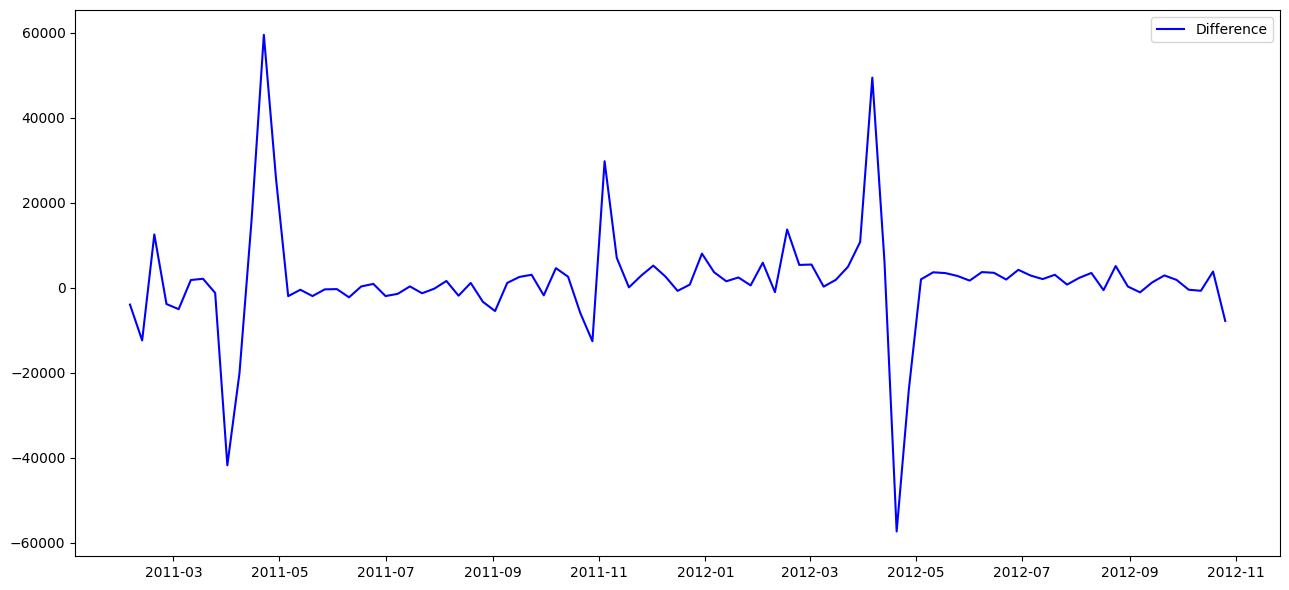

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.legend()
fig.tight_layout()

<Figure size 800x600 with 0 Axes>

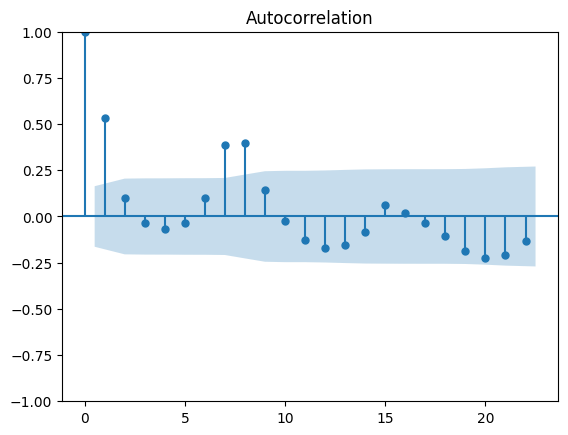

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
ax1 = plot_acf(df_week_diff)

<Figure size 800x600 with 0 Axes>

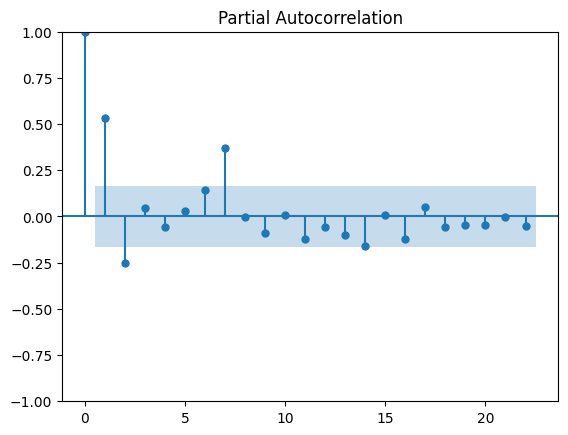

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
ax2 = plot_pacf(df_week_diff)

In [ ]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(df_week_diff, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1549.980
Date:                Mon, 15 Apr 2024   AIC                           3109.959
Time:                        14:57:36   BIC                           3124.773
Sample:                    02-05-2010   HQIC                          3115.979
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.698e+04   2703.264     13.680      0.000    3.17e+04    4.23e+04
ar.L1          0.1359      0.841      0.162      0.872      -1.513       1.784
ma.L1          0.5563      0.875      0.636      0.5

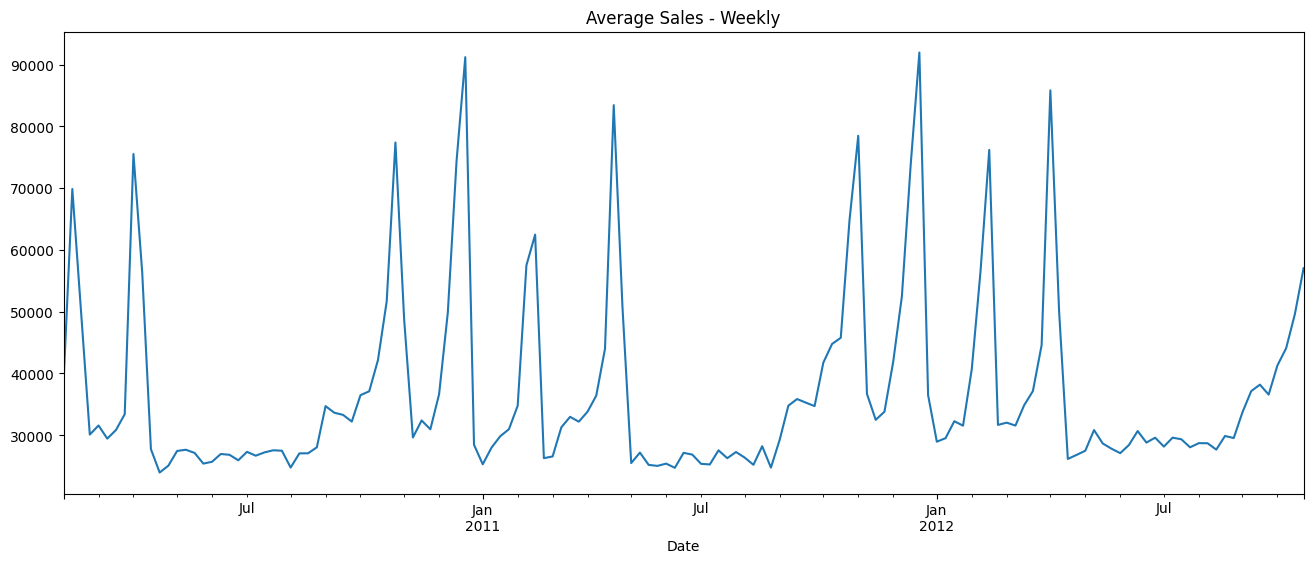

In [ ]:
plt.figure(figsize=(16,6))
store4dept1['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

Train: (100, 1)
Test: (43, 1)


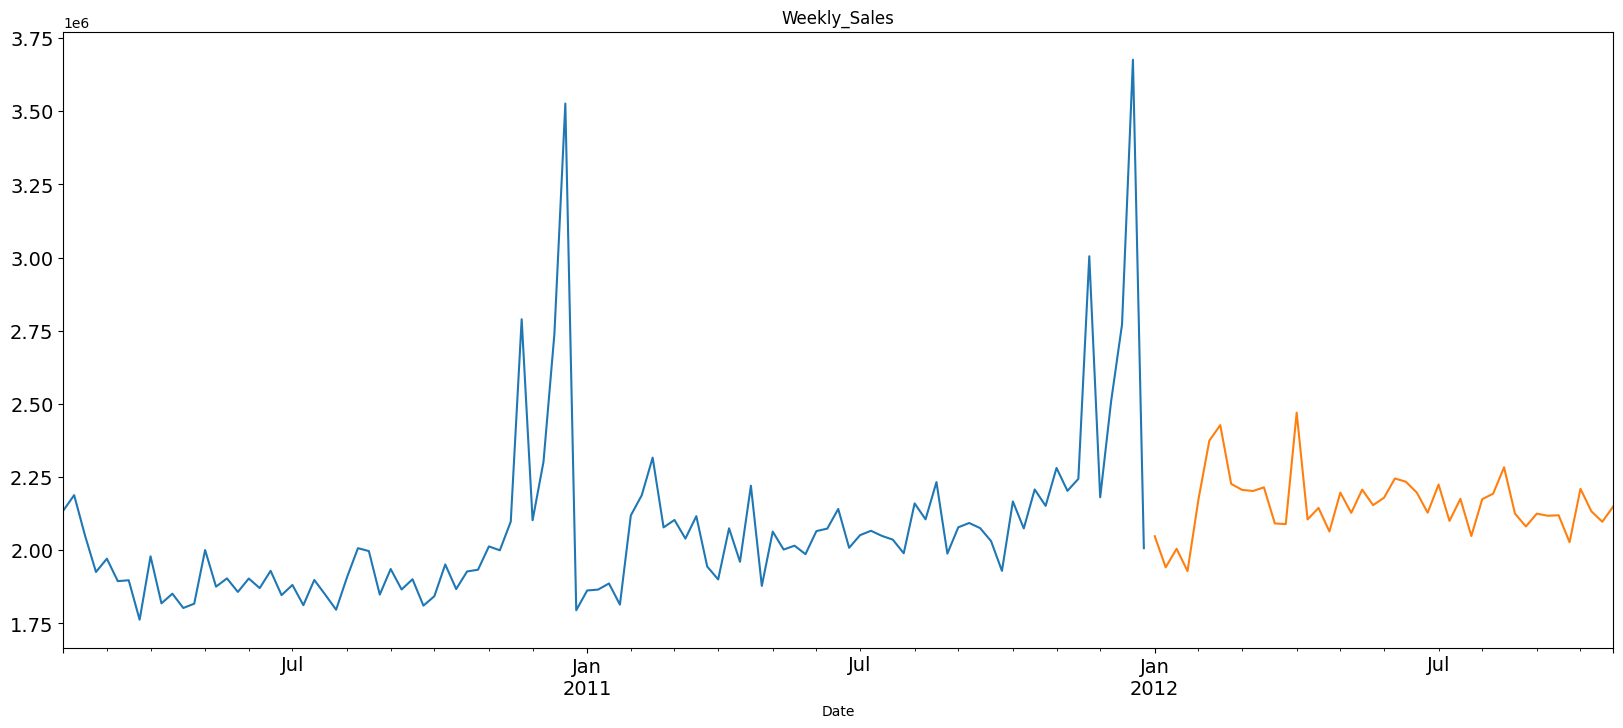

In [ ]:
train_data = sales4[:int(0.7*(len(sales4)))]
test_data = sales4[int(0.7*(len(sales4))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)
target = "Weekly_Sales"
used_cols = [c for c in sales4.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [ ]:
df_week_diff = np.log(sales4['Weekly_Sales']/sales4['Weekly_Sales'].shift(1))
mean = np.nanmean(df_week_diff)
df_week_diff[0]=mean
df_week_diff[:5]

Date
2010-02-05    0.000048
2010-02-12    0.024594
2010-02-19   -0.065357
2010-02-26   -0.062467
2010-03-05    0.023266
Name: Weekly_Sales, dtype: float64

In [ ]:
df_week_diff

Date
2010-02-05    0.000048
2010-02-12    0.024594
2010-02-19   -0.065357
2010-02-26   -0.062467
2010-03-05    0.023266
                ...   
2012-09-28   -0.044288
2012-10-05    0.086055
2012-10-12   -0.035376
2012-10-19   -0.016907
2012-10-26    0.024644
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
df_week_diff = sales4['Weekly_Sales'].diff().dropna() #creating difference values

In [ ]:
df_week_diff = store4dept1['Weekly_Sales']

In [ ]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [ ]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=False,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2408.326, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2335.007, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2324.776, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2250.756, Time=0.58 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2329.612, Time=0.23 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2327.730, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2214.924, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2216.974, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2193.270, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.42 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2217.002, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2216.029, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.62 sec
 ARIMA(3,0,0)(0,0,0)[0]       

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

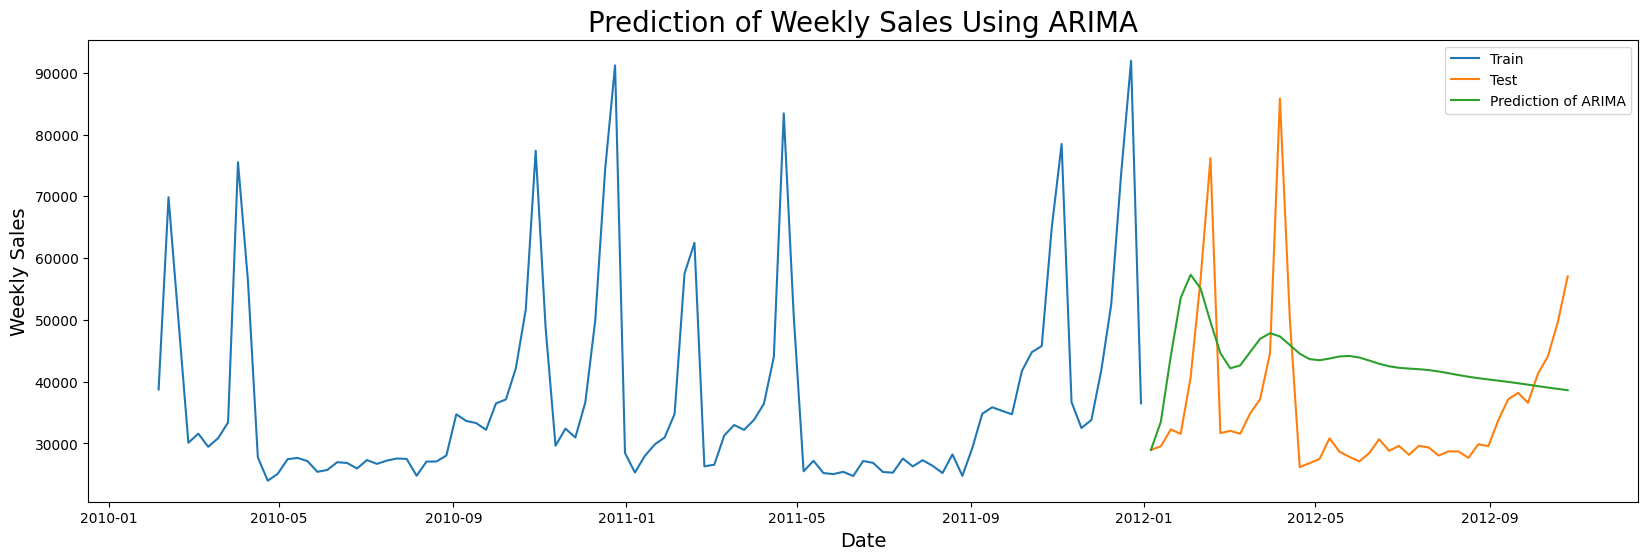

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data_diff.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
model_sarima = auto_arima(train_data_diff, start_p=0, start_q=0,
                           max_p=20, max_q=20, m=52,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
model_sarima.fit(train_data_diff)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[52] intercept   : AIC=1051.379, Time=3.83 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=1050.441, Time=0.27 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=1047.427, Time=3.16 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=1043.761, Time=2.42 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=1049.622, Time=0.24 sec
 ARIMA(0,0,1)(0,1,0)[52] intercept   : AIC=1043.271, Time=0.35 sec
 ARIMA(0,0,1)(1,1,0)[52] intercept   : AIC=1043.819, Time=2.97 sec
 ARIMA(0,0,1)(1,1,1)[52] intercept   : AIC=inf, Time=9.43 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=1045.157, Time=0.56 sec
 ARIMA(0,0,2)(0,1,0)[52] intercept   : AIC=1045.039, Time=0.59 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=1048.004, Time=0.35 sec
 ARIMA(1,0,2)(0,1,0)[52] intercept   : AIC=1043.727, Time=1.00 sec
 ARIMA(0,0,1)(0,1,0)[52]             : AIC=1041.465, Time=0.30 sec
 ARIMA(0,0,1)(1,1,0)[52]             : AIC=1042.601, Time=2.91 sec
 ARIMA(0,0,1)(0,1,1)[52]

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

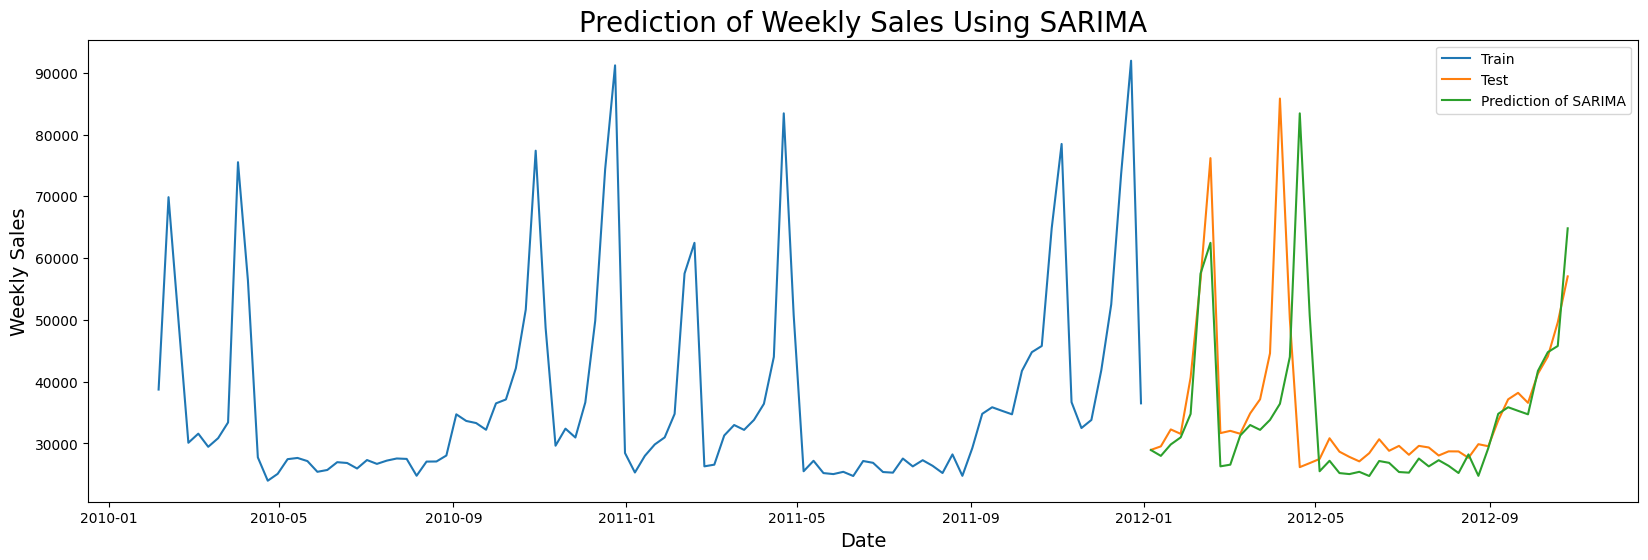

In [ ]:
y_pred = model_sarima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data_diff.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using SARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of SARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
import numpy as np
from sklearn import metrics
print("MAE" , metrics.mean_absolute_error(test_data_diff, y_pred))
print("MSE" , metrics.mean_squared_error(test_data_diff, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(test_data_diff, y_pred)))
print("R2" , metrics.explained_variance_score(test_data_diff, y_pred))

MAE 6003.582252251976
MSE 163161389.72380328
RMSE 12773.46428044496
R2 -0.006083002641460222
